### Dataset
For this lab, we’ll use a simulated dataset of monthly sales data for a fictional company across different regions. This dataset will allow students to practice creating tables and visualizations to uncover insights.

In [3]:
import pandas as pd
import numpy as np

# Sample Data Creation
np.random.seed(0)
months = pd.date_range("2023-01-01", periods=12, freq="ME")
regions = ['North', 'South', 'East', 'West']
data = {
    'Month': np.tile(months, len(regions)),
    'Region': np.repeat(regions, len(months)),
    'Sales': np.random.randint(100, 500, size=len(months) * len(regions)),
    'Profit': np.random.randint(20, 200, size=len(months) * len(regions))
}
df = pd.DataFrame(data)




### Lab Steps

#### Step 1: Displaying Data in a Table

Start by displaying the dataset in a tabular format. This helps provide a quick overview of the data.


In [4]:
# Display the data
df.head()

,Month,Region,Sales,Profit
0,2023-01-31,North,272,171
1,2023-02-28,North,147,183
2,2023-03-31,North,217,134
3,2023-04-30,North,292,48
4,2023-05-31,North,423,54


**Questions for Students:**
1. Identify the number of rows and columns in this dataset.
2. Check for any missing values in the dataset.



#### Step 2: Creating a Heatmap for Sales Data

A heatmap is useful for visualizing the intensity of sales across different regions and months.

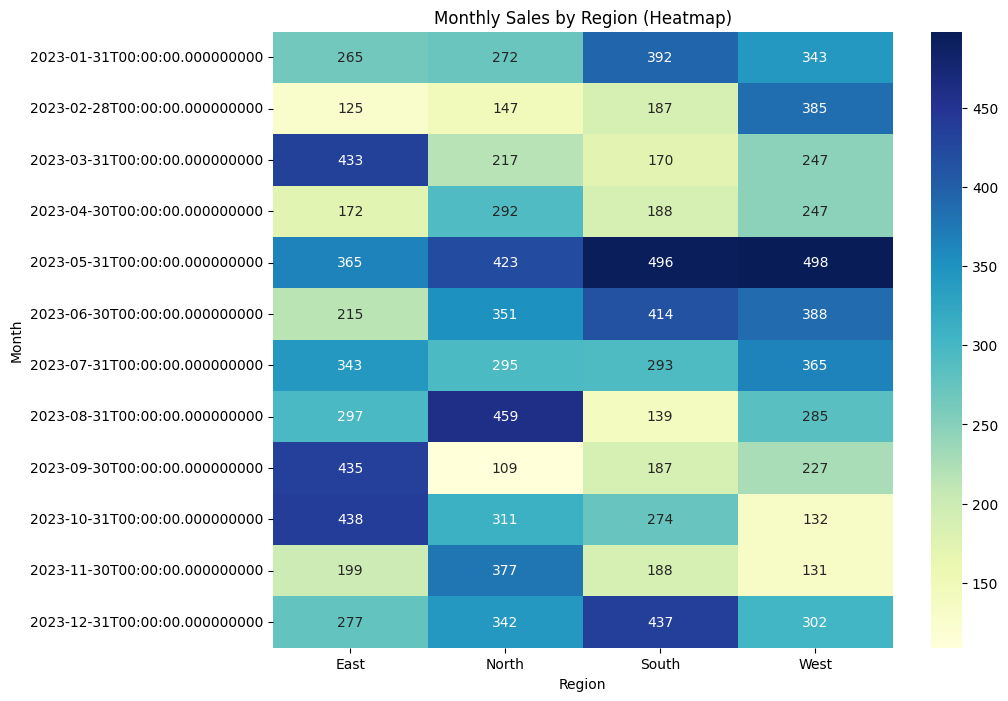

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot data for heatmap
sales_pivot = df.pivot(index="Month", columns="Region", values="Sales")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sales_pivot, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Monthly Sales by Region (Heatmap)")
plt.show()


**Questions for Students:**
1. Which region had the highest sales during the year?
2. Identify any seasonal trends in sales across regions.

#### Step 3: Plotting Data with Points, Lines, Bars, and Area Graphs

Visualizing the data using different graph types to understand sales and profit trends over time.



1. **Point Plot**: Visualizes sales and profit for each region and month.


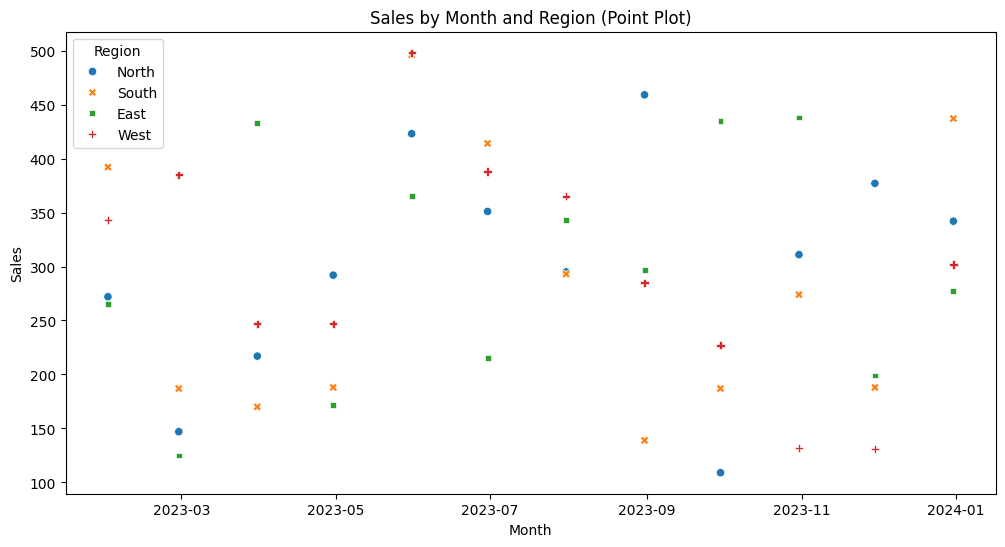

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Month', y='Sales', hue='Region', style='Region')
plt.title("Sales by Month and Region (Point Plot)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

A **Bubble Chart** is an enhanced version of a scatter plot where each point is represented as a bubble, and the size and color of the bubbles convey additional data dimensions. It’s particularly useful when you want to illustrate three or more variables in a single chart.

Here’s how to create a bubble chart in Python using Matplotlib and Pandas. In this example, we’ll use the fictional sales data to show:

- **Sales** on the x-axis
- **Profit** on the y-axis
- **Bubble size** representing sales amount
- **Bubble color** representing regions


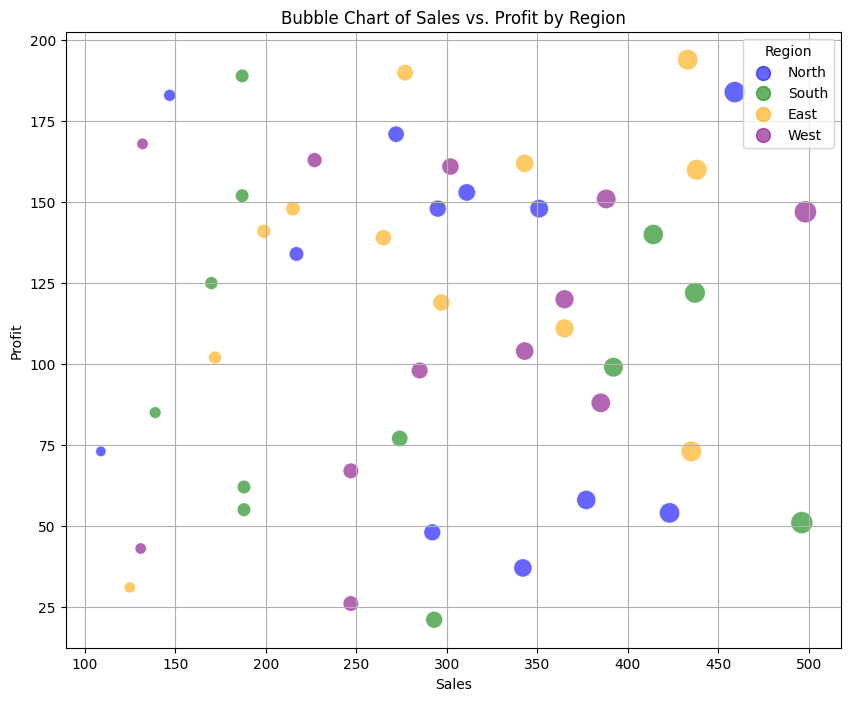

In [12]:
import matplotlib.pyplot as plt

# Define a color dictionary for each region
color_dict = {'North': 'blue', 'South': 'green', 'East': 'orange', 'West': 'purple'}
df['Color'] = df['Region'].map(color_dict)

# Plot Bubble Chart
plt.figure(figsize=(10, 8))
plt.scatter(df['Sales'], df['Profit'], s=df['Sales'] * 0.5,  # Bubble size
            c=df['Color'], alpha=0.6, edgecolors="w", linewidth=0.5)

# Add labels and title
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Bubble Chart of Sales vs. Profit by Region")
plt.grid(True)

# Add a legend manually for region colors
for region, color in color_dict.items():
    plt.scatter([], [], c=color, alpha=0.6, s=100, label=region)
plt.legend(title="Region")

plt.show()


### Explanation of the Code:

- **x-axis** (`df['Sales']`): Represents the sales figures.
- **y-axis** (`df['Profit']`): Represents the profit.
- **Bubble Size** (`s=df['Sales'] * 0.5`): The size of each bubble is proportional to the sales amount. Adjust the multiplier to scale the bubbles for better visualization.
- **Bubble Color** (`c=df['Color']`): Each region is given a unique color, allowing for easy distinction.

### Interpretation

- Larger bubbles represent higher sales.
- The color indicates the region, providing a quick visual clue about regional sales and profit trends.
- This chart allows you to see relationships between sales, profit, and regions all in one plot, highlighting regions with high or low performance at a glance.

**Line Graphs and Slope Graphs** are widely used for visualizing continuous data over time. They allow us to observe trends, patterns, and changes across time intervals such as days, months, quarters, or years.

### Key Characteristics

1. **Line Graphs**: Ideal for showing trends over time. The data points are connected by a line, making it easy to see the flow and direction of change.
2. **Slope Graphs**: Useful for comparing changes between two points in time. They focus on the relative change by connecting two data points with a line, often comparing categories side by side.


### Example 1: Creating a Line Graph in Python

We’ll create a line graph to illustrate monthly sales data across a year.

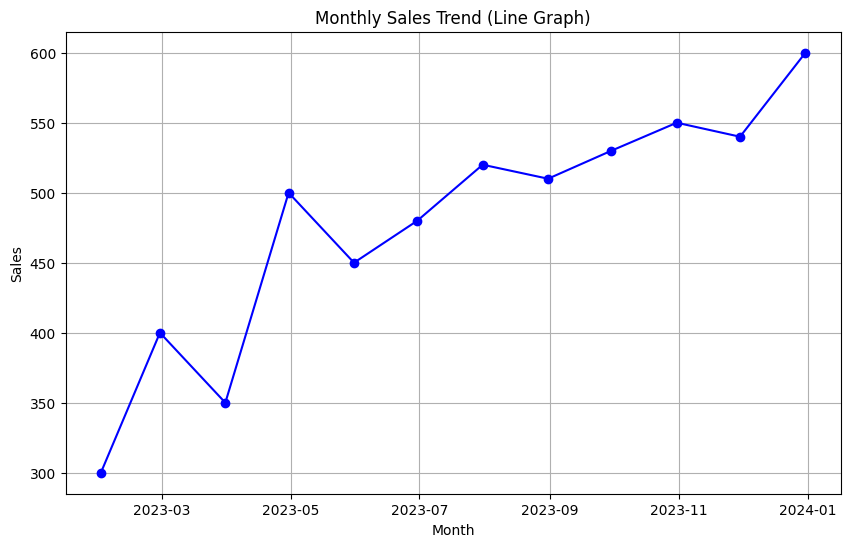

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: Monthly sales data for one region
data = {
    'Month': pd.date_range("2023-01-01", periods=12, freq="ME"),
    'Sales': [300, 400, 350, 500, 450, 480, 520, 510, 530, 550, 540, 600]
}
df_line = pd.DataFrame(data)

# Plot Line Graph
plt.figure(figsize=(10, 6))
plt.plot(df_line['Month'], df_line['Sales'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend (Line Graph)")
plt.grid(True)

plt.show()


### Explanation of the Line Graph Code

- **Line Plot**: `plt.plot()` is used to create the line plot, where `marker='o'` adds points on the line for better visibility.
- **Monthly Sales Trend**: The chart shows how sales fluctuate over the year, making it easy to observe any seasonal or gradual changes in the data.



### Example 2: Creating a Slope Graph in Python

Now, we’ll create a slope graph to compare the sales change between January and December for different regions. This helps highlight which regions experienced the highest growth or decline.


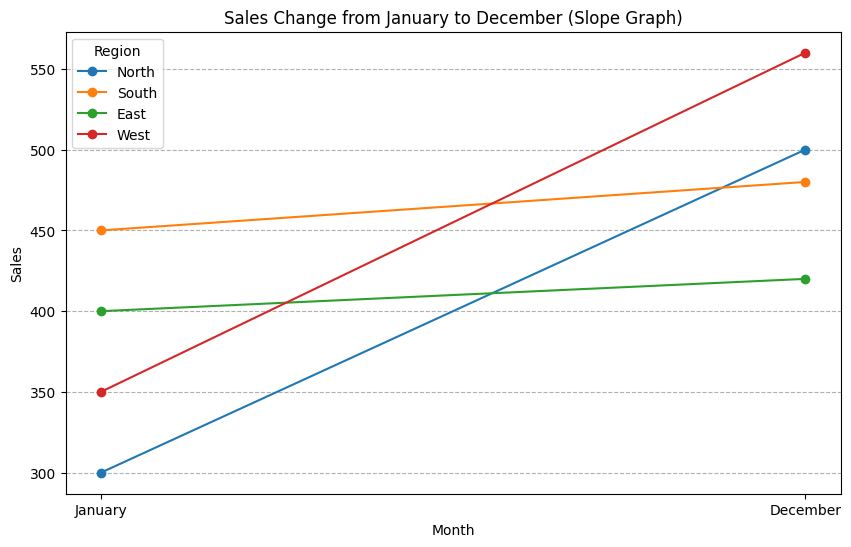

In [15]:
import matplotlib.pyplot as plt

# Sample data: Sales comparison between two months
data_slope = {
    'Region': ['North', 'South', 'East', 'West'],
    'January Sales': [300, 450, 400, 350],
    'December Sales': [500, 480, 420, 560]
}
df_slope = pd.DataFrame(data_slope)

# Plot Slope Graph
plt.figure(figsize=(10, 6))
for i, row in df_slope.iterrows():
    plt.plot(['January', 'December'], [row['January Sales'], row['December Sales']], marker='o', label=row['Region'])

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Change from January to December (Slope Graph)")
plt.legend(title="Region")
plt.grid(True, axis='y', linestyle='--')

plt.show()



### Explanation of the Slope Graph Code

- **Plotting Changes**: Each region’s sales for January and December are connected by a line, allowing us to quickly see the direction and magnitude of change.
- **Interpretation**: The slope graph makes it easy to compare sales growth or decline across regions. A steeper slope indicates a larger change between the two months.

---

### Interpretation of Line and Slope Graphs

- **Line Graph**: Useful for continuous monitoring, it shows the trend or pattern over time, such as rising or falling sales.
- **Slope Graph**: Highlights changes between two points, which is great for comparing growth or decline in categories over a specific period.

These graphs are excellent tools for visualizing continuous data, enabling the audience to easily interpret trends and comparisons across time.

**Bar Charts** are one of the most effective and easy-to-read ways of visualizing data. They allow the audience to quickly grasp differences across categories, making them ideal for comparing quantities. Here’s a quick guide to creating bar charts along with important principles:

### Key Points about Bar Charts

1. **Audience-Friendly**: Bar charts are highly intuitive, and viewers can quickly interpret them without extensive explanation.
2. **Comparative Visualization**: They clearly display differences between categories.
3. **Baseline Rule**: Always start the y-axis at zero to accurately reflect the differences between categories.



### Example: Creating a Bar Chart in Python

Let’s visualize the total sales across different regions using a bar chart in Python. This will help illustrate the differences in sales performance across regions.



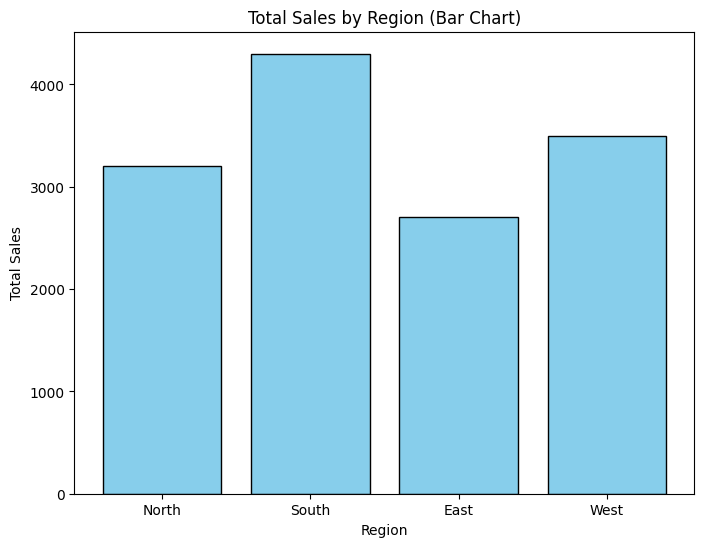

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Region': ['North', 'South', 'East', 'West'],
    'Total Sales': [3200, 4300, 2700, 3500]
}
df_bar = pd.DataFrame(data)

# Create Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(df_bar['Region'], df_bar['Total Sales'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region (Bar Chart)")
plt.ylim(0)  # Ensures a zero baseline

plt.show()


### Explanation of the Code

- **`plt.bar()`**: Creates a bar chart with regions on the x-axis and total sales on the y-axis.
- **Baseline at Zero**: The y-axis is set to start at zero (`plt.ylim(0)`) to follow the best practices for bar charts.
- **Labels and Titles**: Labels and a title are added to make the chart more readable.

### Interpretation

- **Category Comparison**: The bar chart clearly shows which regions have higher total sales.
- **Quick Insights**: Viewers can immediately see which region outperforms others and where sales are lower, making it ideal for presentations or reports.


### Types of Bar Charts

Bar charts come in various types, each suited for different types of data and analysis goals. Let’s explore each type, their usage, and examples of how to create them in Python.

---

### 1. **Vertical Bar Chart**
A standard bar chart with vertical bars, ideal for comparing categories in terms of a single value.



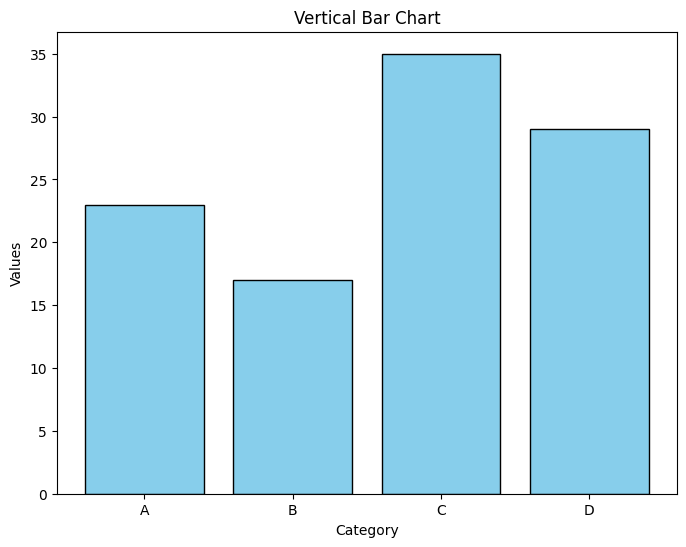

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {'Category': ['A', 'B', 'C', 'D'], 'Values': [23, 17, 35, 29]}
df = pd.DataFrame(data)

# Vertical Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(df['Category'], df['Values'], color='skyblue', edgecolor='black')
plt.xlabel("Category")
plt.ylabel("Values")
plt.title("Vertical Bar Chart")
plt.show()


### 2. **Stacked Vertical Bar Chart**
A stacked bar chart shows the composition of different categories within each bar, often used for parts-to-whole analysis.


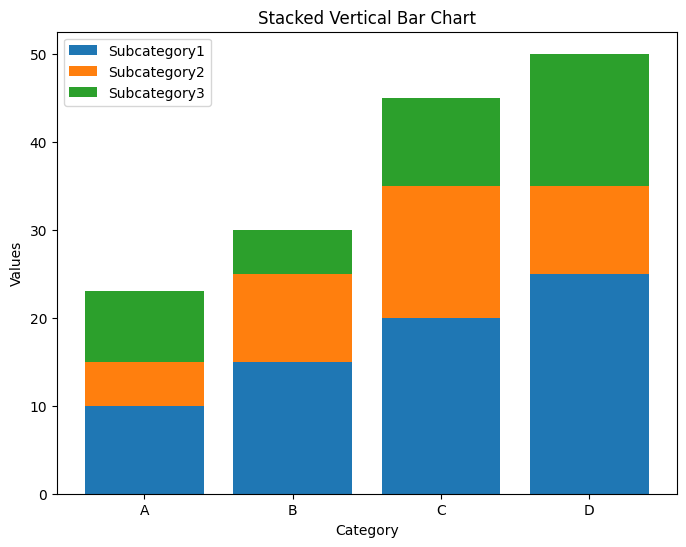

In [18]:
import numpy as np

# Sample data
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Subcategory1': [10, 15, 20, 25],
    'Subcategory2': [5, 10, 15, 10],
    'Subcategory3': [8, 5, 10, 15]
}
df_stacked = pd.DataFrame(data)

# Stacked Vertical Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(df_stacked['Category'], df_stacked['Subcategory1'], label="Subcategory1")
plt.bar(df_stacked['Category'], df_stacked['Subcategory2'], bottom=df_stacked['Subcategory1'], label="Subcategory2")
plt.bar(df_stacked['Category'], df_stacked['Subcategory3'],
        bottom=df_stacked['Subcategory1'] + df_stacked['Subcategory2'], label="Subcategory3")

plt.xlabel("Category")
plt.ylabel("Values")
plt.title("Stacked Vertical Bar Chart")
plt.legend()
plt.show()


### 3. **Waterfall Chart**
A waterfall chart shows cumulative effect, often used in financial and business data to illustrate sequential changes.


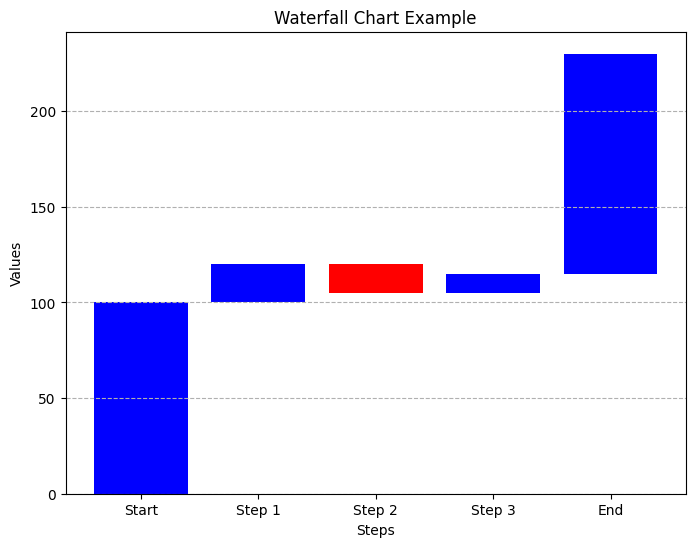

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Start', 'Step 1', 'Step 2', 'Step 3', 'End']
values = [100, 20, -15, 10, 115]  # Start value, increments/decrements, and final value

# Calculate cumulative values for the waterfall chart
cumulative_values = np.cumsum(values)
cumulative_values = np.insert(cumulative_values, 0, 0)  # Insert a starting point of 0
changes = np.diff(cumulative_values)

# Determine colors for each step (e.g., blue for positive and red for negative changes)
colors = ['blue' if change >= 0 else 'red' for change in changes]

# Plotting the waterfall chart
plt.figure(figsize=(8, 6))
for i, (start, change) in enumerate(zip(cumulative_values[:-1], changes)):
    plt.bar(categories[i], change, bottom=start, color=colors[i])

# Labels and title
plt.xlabel("Steps")
plt.ylabel("Values")
plt.title("Waterfall Chart Example")
plt.grid(True, axis='y', linestyle='--')
plt.show()


### 4. **Horizontal Bar Chart**
A horizontal bar chart is a rotated version of a vertical bar chart, making it easier to display long category labels or to compare categories with a common scale.



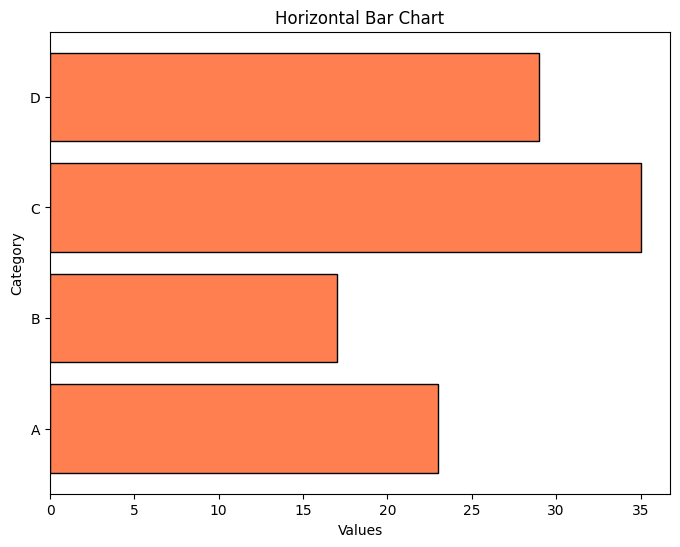

In [20]:
# Horizontal Bar Chart
plt.figure(figsize=(8, 6))
plt.barh(df['Category'], df['Values'], color='coral', edgecolor='black')
plt.xlabel("Values")
plt.ylabel("Category")
plt.title("Horizontal Bar Chart")
plt.show()


### 5. **Stacked Horizontal Bar Chart**
Similar to the stacked vertical bar chart, but horizontal. This is particularly useful when categories are labeled with longer names or when the composition of categories is better understood horizontally.


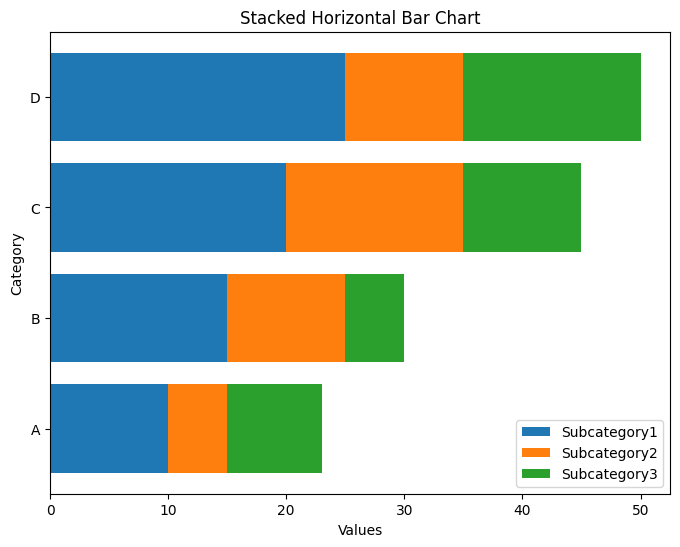

In [21]:
# Stacked Horizontal Bar Chart
plt.figure(figsize=(8, 6))
plt.barh(df_stacked['Category'], df_stacked['Subcategory1'], label="Subcategory1")
plt.barh(df_stacked['Category'], df_stacked['Subcategory2'], left=df_stacked['Subcategory1'], label="Subcategory2")
plt.barh(df_stacked['Category'], df_stacked['Subcategory3'],
         left=df_stacked['Subcategory1'] + df_stacked['Subcategory2'], label="Subcategory3")

plt.xlabel("Values")
plt.ylabel("Category")
plt.title("Stacked Horizontal Bar Chart")
plt.legend()
plt.show()

## Summary of Bar Chart Types and Their Use Cases

- **Vertical Bar Chart**: Best for comparing categories on a single value (e.g., sales by product).
- **Stacked Vertical Bar Chart**: Useful for showing the composition within categories (e.g., sales by product split into regions).
- **Waterfall Chart**: Ideal for showing cumulative changes step by step (e.g., changes in net income).
- **Horizontal Bar Chart**: Good for long category names and quick comparisons (e.g., survey results by demographic).
- **Stacked Horizontal Bar Chart**: Combines comparison and composition in a horizontal format (e.g., budget allocation by department).

These various types of bar charts offer flexibility in data visualization, catering to different analytical needs and making complex data easier to interpret.

4. **Area Plot**: Shows cumulative sales over time for all regions.

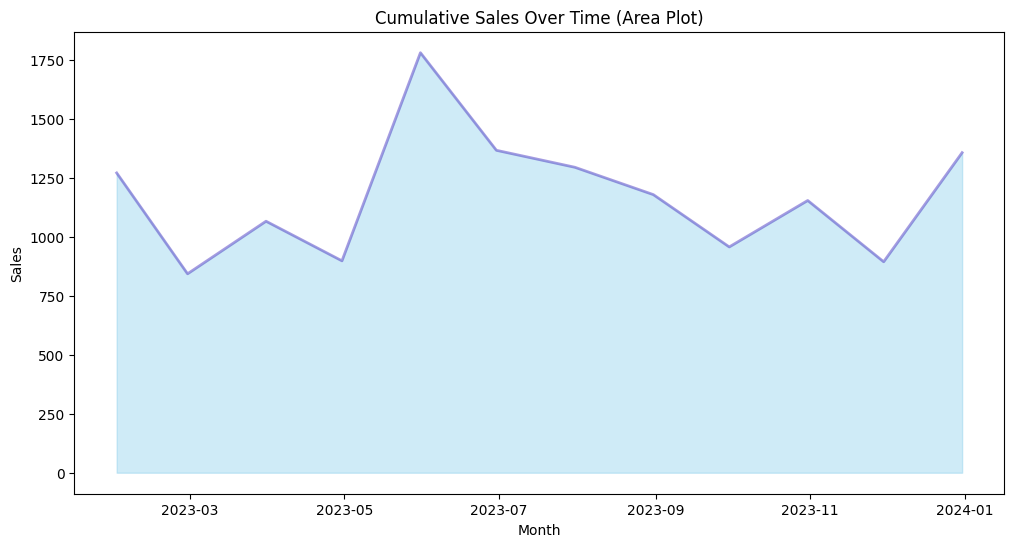

In [11]:
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.fill_between(monthly_sales.index, monthly_sales.values, color="skyblue", alpha=0.4)
plt.plot(monthly_sales.index, monthly_sales.values, color="Slateblue", alpha=0.6, linewidth=2)
plt.title("Cumulative Sales Over Time (Area Plot)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()